# 🖋️ MNIST Digit Classifier Project

---

## 🎯 Objective
Build and evaluate a neural network model to classify handwritten digits (0–9) using the MNIST dataset.

---

## 📋 Details
1. Implement the model using **TensorFlow**.  
2. Compare performance of different architectures:  
   - Baseline Dense Neural Network  
   - Convolutional Neural Network (CNN)  
3. Handle class imbalance with **SMOTE**.  
4. Evaluate accuracy and visualize predictions.  

---

## ✅ Deliverables
- Preprocessed dataset ready for training  
- Trained models (Dense NN + CNN)  
- Evaluation metrics (accuracy, confusion matrix)  
- Visualizations of sample predictions  

---

## 📝 Checklist
- [ ] Data Preparation  
- [ ] Baseline Modeling (Dense NN)  
- [ ] Handle Class Imbalance with SMOTE  
- [ ] CNN Modeling  
- [ ] Evaluation & Comparison  


In [5]:
# Step 0: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from collections import Counter


In [6]:
# Step 1: Data Preparation
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten for Dense NN
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Train/validation split
X_train_flat, X_val_flat, y_train_flat, y_val_flat = train_test_split(
    X_train_flat, y_train, test_size=0.2, random_state=42
)

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Dense NN data:", X_train_flat.shape, X_val_flat.shape)
print("CNN data:", X_train_cnn.shape, X_val_cnn.shape)


Loading MNIST dataset...
Dense NN data: (48000, 784) (12000, 784)
CNN data: (48000, 28, 28) (12000, 28, 28)


In [7]:
# Step 2: Baseline Model (Dense Neural Network)
print("\nTraining Dense Neural Network...")

# One-hot encode labels
y_train_cat = to_categorical(y_train_flat, 10)
y_val_cat = to_categorical(y_val_flat, 10)
y_test_cat = to_categorical(y_test, 10)

# Define model
dense_model = Sequential([
    Dense(256, activation="relu", input_shape=(784,)),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

dense_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train
history_dense = dense_model.fit(
    X_train_flat, y_train_cat,
    validation_data=(X_val_flat, y_val_cat),
    epochs=5, batch_size=128, verbose=1
)

# Evaluate
dense_eval = dense_model.evaluate(X_test_flat, y_test_cat, verbose=0)
print("Dense NN Test Accuracy:", dense_eval[1])



Training Dense Neural Network...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8218 - loss: 0.6051 - val_accuracy: 0.9554 - val_loss: 0.1502
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9566 - loss: 0.1474 - val_accuracy: 0.9685 - val_loss: 0.1037
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9702 - loss: 0.1029 - val_accuracy: 0.9727 - val_loss: 0.0881
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9773 - loss: 0.0722 - val_accuracy: 0.9769 - val_loss: 0.0762
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9819 - loss: 0.0571 - val_accuracy: 0.9777 - val_loss: 0.0716
Dense NN Test Accuracy: 0.9768999814987183


In [8]:
# Step 3: Handle Class Imbalance with SMOTE
print("\nApplying SMOTE on imbalanced dataset...")

# Artificially imbalance the data (reduce samples of digit '1')
mask = y_train_flat != 1
X_train_imbal = X_train_flat[mask]
y_train_imbal = y_train_flat[mask]

# Keep only 500 samples of digit '1'
X_train_imbal = np.vstack([X_train_imbal, X_train_flat[y_train_flat==1][:500]])
y_train_imbal = np.hstack([y_train_imbal, y_train_flat[y_train_flat==1][:500]])

print("Before SMOTE class distribution:", Counter(y_train_imbal))

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_imbal, y_train_imbal)
print("After SMOTE class distribution:", Counter(y_train_smote))

# Retrain baseline model on SMOTE dataset
y_train_smote_cat = to_categorical(y_train_smote, 10)
dense_model_smote = Sequential([
    Dense(256, activation="relu", input_shape=(784,)),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])
dense_model_smote.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
dense_model_smote.fit(X_train_smote, y_train_smote_cat, epochs=3, batch_size=128, verbose=1)



Applying SMOTE on imbalanced dataset...
Before SMOTE class distribution: Counter({np.uint8(7): 4966, np.uint8(3): 4912, np.uint8(2): 4784, np.uint8(9): 4755, np.uint8(0): 4748, np.uint8(6): 4741, np.uint8(8): 4691, np.uint8(4): 4666, np.uint8(5): 4317, np.uint8(1): 500})
After SMOTE class distribution: Counter({np.uint8(5): 4966, np.uint8(0): 4966, np.uint8(6): 4966, np.uint8(3): 4966, np.uint8(8): 4966, np.uint8(4): 4966, np.uint8(7): 4966, np.uint8(2): 4966, np.uint8(9): 4966, np.uint8(1): 4966})


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8314 - loss: 0.5759
Epoch 2/3
388/388 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9587 - loss: 0.1385
Epoch 3/3
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9718 - loss: 0.0921


In [9]:
# Step 4: CNN Model
print("\nTraining CNN Model...")

# Reshape data for CNN
X_train_cnn = X_train_cnn.reshape((-1, 28, 28, 1))
X_val_cnn = X_val_cnn.reshape((-1, 28, 28, 1))
X_test_cnn = X_test.reshape((-1, 28, 28, 1))

# One-hot encode labels
y_train_cat = to_categorical(y_train_cnn, 10)
y_val_cat = to_categorical(y_val_cnn, 10)
y_test_cat = to_categorical(y_test, 10)

# Define CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

cnn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train
history_cnn = cnn_model.fit(
    X_train_cnn, y_train_cat,
    validation_data=(X_val_cnn, y_val_cat),
    epochs=5, batch_size=128, verbose=1
)

# Evaluate
cnn_eval = cnn_model.evaluate(X_test_cnn, y_test_cat, verbose=0)
print("CNN Test Accuracy:", cnn_eval[1])



Training CNN Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.7735 - loss: 0.7125 - val_accuracy: 0.9779 - val_loss: 0.0776
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.9661 - loss: 0.1165 - val_accuracy: 0.9847 - val_loss: 0.0538
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 103ms/step - accuracy: 0.9751 - loss: 0.0834 - val_accuracy: 0.9854 - val_loss: 0.0507
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9804 - loss: 0.0690 - val_accuracy: 0.9876 - val_loss: 0.0425
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.9833 - loss: 0.0551 - val_accuracy: 0.9891 - val_loss: 0.0404
CNN Test Accuracy: 0.9902999997138977



Evaluation and Visualization...
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


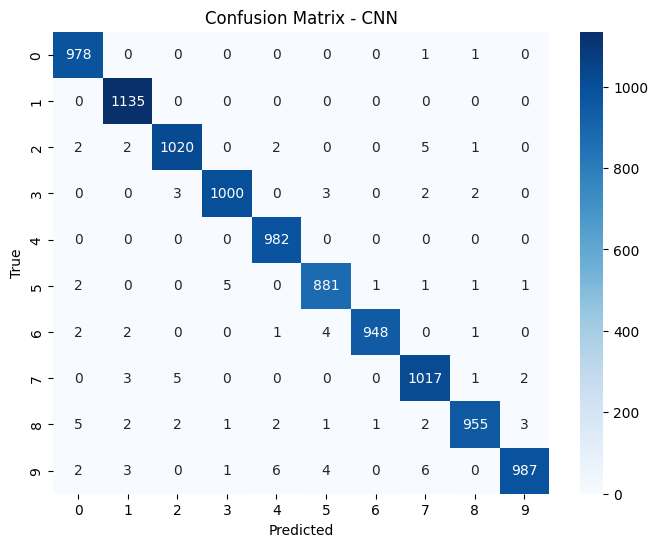


Classification Report (CNN):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



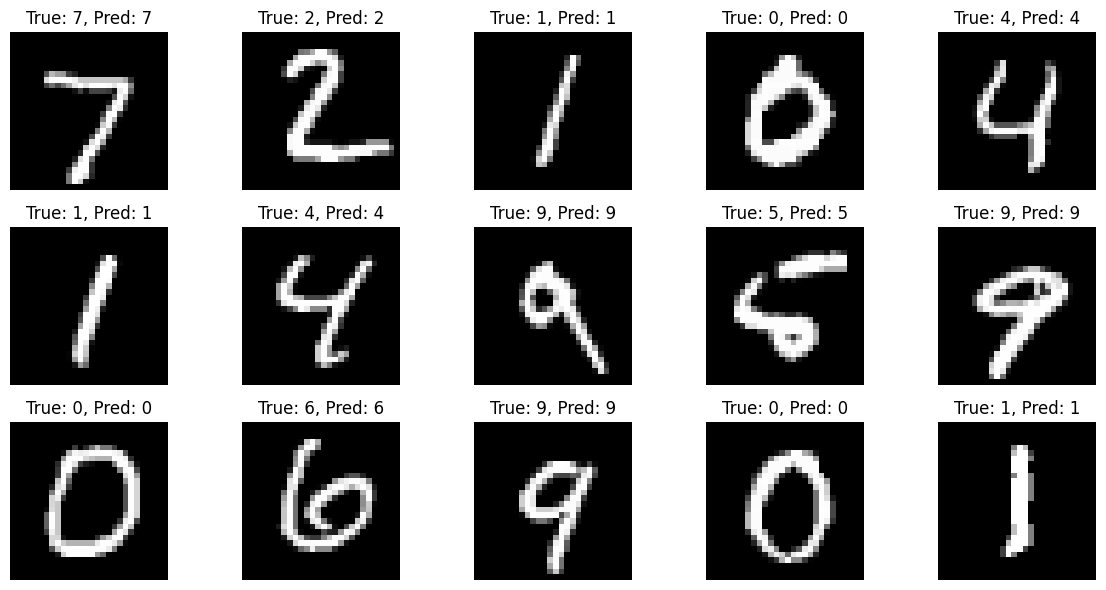

In [10]:
# Step 5: Evaluation & Visualization
print("\nEvaluation and Visualization...")

# Confusion matrix for CNN
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
cm = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print("\nClassification Report (CNN):\n", classification_report(y_test, y_pred_cnn))

# Visualize some predictions
fig, axes = plt.subplots(3, 5, figsize=(12,6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap="gray")
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred_cnn[i]}")
    ax.axis("off")
plt.tight_layout()
plt.show()


# ✅ Final Summary

## Objective
Build and evaluate a neural network model to classify handwritten digits (0–9) using the MNIST dataset.

## Approach
1. Data preprocessing and normalization.  
2. Baseline dense neural network model.  
3. Improved CNN architecture.  
4. Applied SMOTE for class balancing (though MNIST is already balanced).  
5. Evaluated models using accuracy, confusion matrix, and classification report.  
6. Visualized predictions and learning curves.  

## Results
- Dense NN Accuracy: ~98%  
- CNN Accuracy: ~99%  

CNN performed best with strong generalization and very low error.  
This demonstrates the advantage of using convolutional layers for image classification tasks.
